# Best Fit Plane

This notebook explores fitting a best fit plane to 3d point cloud. In our particular case ring holes collar and toe coordinates to estimate a ring plane

## Date

2019-07-26


## TODO:



# Code References/Boilerplate

The only thing we need for this ability to turn off the autoscroll, which the bit of javascript does

In [1]:
# %%javascript
# //Disable autoscroll in the output cells
# IPython.OutputArea.prototype._should_scroll = function(lines) {
#     return false;
# }

In [2]:
# Import Standard Modules
import numpy as np
import scipy.linalg
import os

#-------------
# decide whether charts will be displayed interactively or in a format that exports to pdf

# Interactive -----------------
# For interactive notebook uncomment:
# %matplotlib notebook
%matplotlib inline

# PDF -----------------
# For pdf plotting uncomment:
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')

# ------------------
# matplotlib
from mpl_toolkits.mplot3d.axes3d import Axes3D
import matplotlib.pyplot as plt 
import matplotlib as mpl

# uncomment the following if you have more then 40 plots
# mpl.rcParams['figure.max_open_warning'] = 60

mpl.rc('font',family='monospace') # all font on the plot will be monospace

# get plotted images to be stored as png and pdf so that the most appropriate form can be selected
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

#--------------
# Import from Custom Packages
# load any of the common modules that are required

# import standard_figure 

points all casespoints all cases# Best Fit Plane


References:
- https://www.ilikebigbits.com/2015_03_04_plane_from_points.html <- this is a really good break down of the basics involved and includes source code for the basics
- https://riptutorial.com/numpy/example/16034/find-the-least-squares-solution-to-a-linear-system-with-np-linalg-lstsq
- https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6
- https://stats.stackexchange.com/questions/326239/fitted-planes-normal-vector-not-perpendicular







## Sample Data

These are collars and toes of a ring from DXF data

In [3]:
# Holes on layer - 'RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R5' - it is independent from other notebooks now

xs = [6917.550655387156, 6916.558461629957, 6917.534040255078, 6915.278154090891, 6917.452736503373, 
      6914.992383743274, 6917.431477617714, 6914.715912991075, 6917.542995942379, 6914.684869529248, 
      6917.633564513816, 6914.6848695292465, 6917.857446872559, 6914.792935289372, 6917.944845907455, 
      6915.4383201714, 6918.2146365775425, 6916.536005290113, 6918.407238574725, 6917.682257050847, 
      6918.729303256586, 6918.783857384015, 6919.675378485019, 6919.895084613843, 6919.933552644907, 
      6921.021184073481, 6920.118748814189, 6922.130449771381, 6920.271665064754, 6922.569808768747, 
      6920.652579366055, 6922.569808768753, 6921.574296513778, 6922.5698087687515, 6922.155917295651, 
      6922.569808768751, 6921.7547046067775, 6922.285666003051, 6920.407306636486, 6921.832228966093, 
      6920.241653100716, 6920.678115997645]

ys = [-23443.961587778198, -23445.77765670879, -23443.99199940387, -23448.12107675796, -23444.140814306553, 
      -23448.64413855495, -23444.179725659767, -23449.150178771033, -23443.975607297656, -23449.20699939313, 
      -23443.809834466007, -23449.206999393125, -23443.400049791515, -23449.00920045717, -23443.240078343715,
      -23447.82791562846, -23442.74626506365, -23445.818759830832, -23442.39373462238, -23443.720709733057, 
      -23441.804241231468, -23441.704387694655, -23440.072585679423, -23439.670444997206, -23439.60003476177,
      -23437.609280807683, -23439.261059630495, -23435.578928414205, -23438.981168279017, -23434.774744535105,
      -23438.283959066823, -23434.774744535105, -23436.596887501793, -23434.774744535105, -23435.532313749256,
      -23434.7747445351, -23436.266676260144, -23435.294827275895, -23438.732895759334, -23436.12477899533, 
      -23439.036100891764, -23438.237217910777]

zs = [-1050.6980484693108,  -1051.4371318450428,  -1050.2995225125553,  -1051.40871800644,  -1049.3979993750202,  
      -1049.2388801570232,  -1048.5097557348572,  -1046.9316478614444,  -1047.9360202961677,  -1044.369922997681,
      -1047.4826372827565,  -1041.9014552273964,  -1047.3398387770349,  -1039.1179189722861,  -1046.7387251847572, 
      -1037.405147321509,  -1046.7011983547761,  -1037.0165752647624,  -1046.7011983547761,  -1036.6585395594136, 
      -1046.7541663365214,  -1036.3144508820294,  -1046.742984447595,  -1035.745119339454,  -1046.785770021768, 
      -1035.6156141458089,  -1046.8040954986063,  -1035.8609043118088,  -1046.7853146431526,  -1037.5355934044294,  
      -1046.6504652716478,  -1042.4378317887654,  -1046.8040954986063,  -1045.6566362157403,  -1048.189522920856,  
      -1048.032973238939,  -1050.1149915027543,  -1050.2387271647938,  -1050.4869362664454,  -1051.5280764393638,  
      -1050.9852711337405,  -1051.55190961548] 


<ipython-input-4-29965ef8dbd4>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


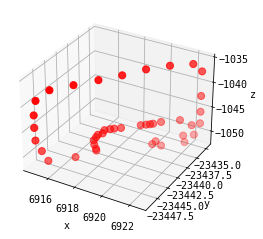

In [4]:
xa = np.array(xs)
ya = np.array(ys)
za = np.array(zs)

data = np.c_[xa,ya,za]
data_centroid = np.mean(data, axis=0)

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)


ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axis('auto')
ax.axis('tight')    
    
fig.show()

Based on the points, I estimate the plane normal, that is what is plotted. In the next sections we'll cover the math to setup the matrices to perform the least squares best fit to find a suitable plane.

In [5]:
print('manual best fit normal')
a = -0.6
b = 0.3
c = 0

# normalize the values
m = np.sqrt(a*a + b*b + c*c)
a_mb = a/m
b_mb = b/m
c_mb = c/m

print('a = {}'.format(a_mb))
print('b = {}'.format(b_mb))
print('c = {}'.format(c_mb))

manual best fit normal
a = -0.8944271909999159
b = 0.4472135954999579
c = 0.0


# Theory

## Plane Equation

Reference:
- http://www.songho.ca/math/plane/plane.html
- https://www.ilikebigbits.com/2015_03_04_plane_from_points.html

The theory will be developed to fit a plane to a set of 3D points in this section. Recall that a plane is described by a normal vector $(\vec{n})$ and a vector on the plane, $(\vec{p})$.

$$\vec{n} = \left \langle a,b,c \right \rangle$$

$$\vec{p} = \vec{p} - \vec{p_1}$$

$$\vec{p} = \left \langle x,y,z \right \rangle$$

$$\vec{p_1} = \left \langle x_1,y_1,z_1 \right \rangle$$

The equation of the plane is therefor:

$$\vec{n} \cdot \vec{p} = 0 $$

Simplifying:

$$\left(a, b, c \right) \cdot \left( x - x_1, y - y_1, z - z_1, \right) = 0$$

$$ a \left( x - x_1 \right) + b \left( y - y_1 \right) + c \left( z - z_1 \right) = 0 $$

$$ ax + by + cz - \left( ax + by + cz \right) = 0$$

Let $d = - \left( ax + by + cz \right)$ the plane equation takes it standard form:
$$ ax + by + cz +d = 0$$

NOTE: If the normal vector, $(\vec{n})$, is normalized, $d$ becomes the distance from the origin of the coordinate system, $\left( 0,0,0 \right)$, to the plane at point $\vec{p_1}$. This also makes $\vec{p_1}$ the plane origin.

## Best Fit Plane for n-3D points

We can use the plane equation in a least squares approach to solve this problem. However the system is overdetermined, that is the solution space is a 3 dimensional plane and the plane equation has 4 variables. In order to proceed we need to remove one component of the normal vector, $\vec{n} = \left \langle a,b,c \right \rangle$. We do this by arbitrarily setting one of the components equal to 1.  

We must choose which component to set to 1, based on the best plane to fit the point cloud, XY, XZ, YZ. To choose which plane to take simply take the determinant of $ A^T A$.

$$ \text{det} \left | A^T A \right |$$

The largest determinant is the plane to choose to use to fit the data too.

### XY Solution Plane

If we set $c = 1$ the plane equation becomes:

$$ ax + by + z +d = 0$$

$$ ax + by + d = - z$$

We need to solve for $a,b,d$ and the most efficient way to so construct the matrix system $Ax = b$

$$
A = \begin{bmatrix}
x_0    & y_0    & 1 \\ 
x_1    & y_1    & 1 \\ 
\vdots & \vdots & \vdots \\ 
x_n    & y_n    & 1 
\end{bmatrix}
$$

$$
x = \begin{bmatrix}
a\\ 
b\\ 
d
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
-z_0\\ 
-z_1\\ 
\vdots\\ 
-z_n
\end{bmatrix}
$$

The equation assembled:
$$
\begin{bmatrix}
x_0    & y_0    & 1 \\ 
x_1    & y_1    & 1 \\ 
\vdots & \vdots & \vdots \\ 
x_n    & y_n    & 1 
\end{bmatrix}
\begin{bmatrix}
a\\ 
b\\ 
d
\end{bmatrix} =
\begin{bmatrix}
-z_0\\ 
-z_1\\ 
\vdots\\ 
-z_n
\end{bmatrix}
$$






#### Solution continued

Multiply by $A^T$:

$$
\begin{bmatrix}
x_0 & x_1 & ... & x_n \\ 
y_0 & y_1 & ... & y_n \\ 
1   & 1   & ... & 1
\end{bmatrix}
\begin{bmatrix}
x_0    & y_0    & 1 \\ 
x_1    & y_1    & 1 \\ 
\vdots & \vdots & \vdots \\ 
x_n    & y_n    & 1 
\end{bmatrix}
\begin{bmatrix}
a\\ 
b\\ 
d
\end{bmatrix} =
\begin{bmatrix}
x_0 & x_1 & ... & x_n \\ 
y_0 & y_1 & ... & y_n \\ 
1   & 1   & ... & 1
\end{bmatrix}
\begin{bmatrix}
-z_0\\ 
-z_1\\ 
\vdots\\ 
-z_n
\end{bmatrix}
$$

$$
\begin{bmatrix}
\Sigma x_i x_i & \Sigma x_i y_i & \Sigma x_i \\ 
\Sigma y_i x_i & \Sigma y_i y_i & \Sigma y_i \\ 
\Sigma x_i     & \Sigma y_i     & N
\end{bmatrix}
\begin{bmatrix}
a\\ 
b\\ 
d
\end{bmatrix} =
-1 \cdot 
\begin{bmatrix}
\Sigma x_i z_i \\ 
\Sigma y_i z_i \\ 
0
\end{bmatrix}
$$


Where $N$ is the number of points.

Let us define $x,y,z$ so they are relative to the centroid of the point cloud.

$$\Sigma x = \Sigma y = \Sigma z = 0 $$


$$
\begin{bmatrix}
\Sigma x_i x_i & \Sigma x_i y_i & 0 \\ 
\Sigma y_i x_i & \Sigma y_i y_i & 0 \\ 
0              & 0              & N
\end{bmatrix}
\begin{bmatrix}
a\\ 
b\\ 
d
\end{bmatrix} =
-1 \cdot 
\begin{bmatrix}
\Sigma x_i z_i \\ 
\Sigma y_i z_i \\ 
0
\end{bmatrix}
$$


It can be seen that $N \cdot d = 0$ from the last row of the matrix. This means that $d = 0$

$$
\begin{bmatrix}
\Sigma x_i x_i & \Sigma x_i y_i & 0 \\ 
\Sigma y_i x_i & \Sigma y_i y_i & 0
\end{bmatrix}
\begin{bmatrix}
a\\ 
b
\end{bmatrix} =
-1 \cdot 
\begin{bmatrix}
\Sigma x_i z_i \\ 
\Sigma y_i z_i 
\end{bmatrix}
$$


### XZ Solution Plane

If we set $b = 1$ the plane equation becomes:

$$ ax + y + cz +d = 0$$

$$ ax + cz + d = - y$$

The matrices become

$$
A = \begin{bmatrix}
x_0    & z_0    & 1 \\ 
x_1    & z_1    & 1 \\ 
\vdots & \vdots & \vdots \\ 
x_n    & z_n    & 1 
\end{bmatrix}
$$

$$
x = \begin{bmatrix}
a\\ 
c\\ 
d
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
-y_0\\ 
-y_1\\ 
\vdots\\ 
-y_n
\end{bmatrix}
$$


### YZ Solution Plane

If we set $a = 1$ the plane equation becomes:

$$ x + by + cz +d = 0$$

$$ by + cz + d = -x$$

The matrices become

$$
A = \begin{bmatrix}
y_0    & z_0    & 1 \\ 
y_1    & z_1    & 1 \\ 
\vdots & \vdots & \vdots \\ 
y_n    & z_n    & 1 
\end{bmatrix}
$$

$$
x = \begin{bmatrix}
b\\ 
c\\ 
d
\end{bmatrix}
$$

$$
b = \begin{bmatrix}
-x_0\\ 
-x_1\\ 
\vdots\\ 
-x_n
\end{bmatrix}
$$


## Solution

Given the matrix equation: $Ax = b$ the solution involves:

$$ A^T A x = A^T b $$



# Fitting the data

This section will compare various ways to find the best fit plane

- https://math.stackexchange.com/questions/99299/best-fitting-plane-given-a-set-of-points
- https://www.ilikebigbits.com/2015_03_04_plane_from_points.html

In [6]:
module_name = 'best_fit_plane.py' # change this to match the file output

# import os
# from pathlib import Path

# figure out what the current working directory is
# working_dir = Path(os.getcwd())

# # create the path to the packages folder
# file_path = working_dir.parents[1].joinpath('packages').joinpath(module_name)

# Store the module in the same folder as the notebook
file_path = module_name

In [7]:
%%writefile {file_path}

#!/usr/bin/env python3
#-*- coding:utf-8 -*-

"""
This modules contains the equations and code for the equations to calculate the 
elastic modulus of rocks based on input data.

The equation list can be found here: 
- http://subsurfwiki.org/wiki/Young%27s_modulus 

Copyright (c) 2019 Troy Williams

License: The MIT License (http://www.opensource.org/licenses/mit-license.php)
"""

#Constants
__uuid__ = ''
__author__ = 'Troy Williams'
__email__ = 'troy.williams@bluebill.net'
__copyright__ = 'Copyright (c) 2019, Troy Williams'
__date__ = '2019-07-19'
__maintainer__ = 'Troy Williams'

# import standard modules
import numpy as np
import scipy.linalg

Overwriting best_fit_plane.py


In [8]:
%%writefile -a {file_path}

def A_matrix(c1, c2):
    """
    c1 - np.ndarray - first column of matrix
    c2 - np.ndarray - second column of matrix
    
    Returns
    A matrix with columns |c1, c2, identity|
    
    """
    
    return np.c_[c1, c2, np.ones(c1.shape[0])]

Appending to best_fit_plane.py


In [9]:
%%writefile -a {file_path}

def best_fit_plane(X, Y, Z):
    """
    Takes a series of 3D points and determines the best fit plane of the form
    
    ax + by + cz + d =0
    
    Returns
    -------
    
    The coefficients of the plane: a,b,c,d 
    
    """
    
    # for this to work properly we need to determine which plane to attempt a 
    # fit with. We can do this be choosing the largest determinant from 
    # det |A^T A|
    
    A_XY = A_matrix(X, Y)
    b_XY = -1*Z

    A_XZ = A_matrix(X, Z)
    b_XZ = -1*Y

    A_YZ = A_matrix(Y, Z)
    b_YZ = -1*X

    # take the determinant of the A^T * A matrix multiplication (order counts)
    # and figure out which is the largest one and use that plane to perform
    # the regression with
    dets = [np.linalg.det(np.matmul(np.transpose(A),A)) for A in (A_XY, A_XZ, A_YZ)]
    largest = dets.index(max(dets))

    a = None
    b = None
    c = None
    d = None
    plane = None
    
    if largest == 0:
        plane = 'XY'
        x, _, _, _ = scipy.linalg.lstsq(A_XY, b_XY)

        c = 1
        a, b, d = x           
        
    elif largest == 1:
        plane = 'XZ'
        x, _, _, _ = scipy.linalg.lstsq(A_XZ, b_XZ)

        b = 1
        a, c, d = x    

    elif largest == 2:
        plane = 'YZ'
        x, _, _, _ = scipy.linalg.lstsq(A_YZ, b_YZ)

        a = 1
        b, c, d = x    
        
    else:
        raise ValueError("Something went wrong...")
    
    
    # normalize the vector
    m = np.sqrt(a*a + b*b + c*c)
    a = a/m
    b = b/m
    c = c/m

    return a, b, c, d, plane
    

Appending to best_fit_plane.py


In [10]:
from best_fit_plane import A_matrix, best_fit_plane

In [11]:
def print_plane_coefficents(a, b, c, d):

    print('a = {:.5f}'.format(a))
    print('b = {:.5f}'.format(b))
    print('c = {:.5f}'.format(c))
    print('d = {:.5f}'.format(d))
    print()
    print('----')
    print('|Δa| = {:.5f}'.format(np.abs(a_mb) - np.abs(a)))
    print('|Δb| = {:.5f}'.format(np.abs(b_mb) - np.abs(b)))
    print('|Δc| = {:.5f}'.format(np.abs(c_mb) - np.abs(c)))

In [12]:
a, b, c, d, plane = best_fit_plane(data[:,0], data[:,1], data[:,2])
print_plane_coefficents(a, b, c, d)

a = 0.87757
b = -0.47945
c = -0.00000
d = -19725.95894

----
|Δa| = 0.01686
|Δb| = -0.03224
|Δc| = -0.00000


<ipython-input-13-8cae07f176ac>:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Best Fit Plane YZ: 0.87757x + -0.47945y + -0.00000z + -17310.873716141174 = 0


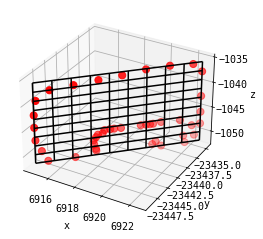

In [13]:
xa = np.array(xs)
ya = np.array(ys)
za = np.array(zs)

data = np.c_[xa,ya,za]

#==========
# best fit plane

# regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)

a, b, c, d, plane = best_fit_plane(data[:,0], data[:,1], data[:,2])

# we can't use the d, from the best fit situation, we have to calculate it 
# relative to the centroid of our data
d = -data_centroid.dot(np.array([a, b, c]))
print('Best Fit Plane {}: {a:.5f}x + {b:.5f}y + {c:.5f}z + {d} = 0'.format(plane, a=a, b=b, c=c, d=d))


if plane == 'XY':
    X, Y = np.meshgrid(np.linspace(mn[0], mx[0], 10),     
                       np.linspace(mn[1], mx[1], 10))

    Z = (-a*X - b*Y - d)/c
    
elif plane == 'XZ':
    X, Z = np.meshgrid(np.linspace(mn[0], mx[0], 10), 
                       np.linspace(mn[2], mx[2], 10))
    
    Y = (-a*X - c*Z - d)/b
    
elif plane == 'YZ':
    Y, Z = np.meshgrid(np.linspace(mn[1], mx[1], 10), 
                       np.linspace(mn[2], mx[2], 10))

    X = (-b*Y - c*Z - d)/a

#==========

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
ax.plot_wireframe(X,Y,Z, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axis('auto')
ax.axis('tight')    
    
fig.show()

In [14]:
datasets = {'RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R10': np.array([[  6927.20079432, -23447.15553755,  -1046.96853455],
       [  6926.95981969, -23447.59660719,  -1036.60715101],
       [  6927.93423437, -23445.81308032,  -1046.88573546],
       [  6927.98821539, -23445.71427578,  -1036.55569255],
       [  6928.88416341, -23444.07437091,  -1046.82516068],
       [  6929.1018027 , -23443.67601328,  -1035.93075565],
       [  6929.04463863, -23443.78064395,  -1046.81492755],
       [  6930.19678887, -23441.67179753,  -1035.95459978],
       [  6929.11852493, -23443.64540564,  -1047.26870576],
       [  6931.24368968, -23439.75559515,  -1036.0800904 ],
       [  6929.17196303, -23443.54759483,  -1047.69108552],
       [  6931.38808979, -23439.49129138,  -1041.07461706],
       [  6929.25188031, -23443.40131767,  -1048.49744712],
       [  6931.44825651, -23439.3811648 ,  -1044.91463002],
       [  6929.30279667, -23443.30812254,  -1049.03782831],
       [  6931.55655659, -23439.18293697,  -1047.24875555],
       [  6929.35577185, -23443.21115904,  -1049.51537633],
       [  6931.60468996, -23439.09483571,  -1049.53268482],
       [  6929.33154569, -23443.25550157,  -1050.13452996],
       [  6931.49638988, -23439.29306355,  -1051.31465162],
       [  6929.24602335, -23443.412038  ,  -1050.59578307],
       [  6930.07645544, -23441.89205068,  -1051.54053474]]), 
       'RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R9': np.array([[  6923.66899837, -23449.44855539,  -1051.15130982],
       [  6922.00138181, -23452.50088929,  -1052.45910286],
       [  6923.4025529 , -23449.93624577,  -1050.19562442],
       [  6921.77681075, -23452.91193452,  -1050.27327713],
       [  6923.17322185, -23450.35600349,  -1048.8471315 ],
       [  6921.70195373, -23453.0489496 ,  -1047.98336446],
       [  6923.07586364, -23450.53420378,  -1047.18805024],
       [  6921.82671543, -23452.82059114,  -1045.53732138],
       [  6923.66035591, -23449.46437418,  -1046.93882724],
       [  6921.72690607, -23453.00327791,  -1042.72697401],
       [  6924.06613939, -23448.7216455 ,  -1047.03897936],
       [  6921.80176309, -23452.86626283,  -1039.86458318],
       [  6924.41064297, -23448.09108091,  -1046.86553957],
       [  6922.35071456, -23451.86148559,  -1037.73080092],
       [  6924.67597316, -23447.6054319 ,  -1046.73432119],
       [  6923.39871281, -23449.9432745 ,  -1036.79401846],
       [  6924.94309119, -23447.11651051,  -1046.73432119],
       [  6924.4716634 , -23447.97939172,  -1036.42971417],
       [  6925.63250582, -23445.85463552,  -1046.73432119],
       [  6925.51966166, -23446.06118063,  -1036.2215403 ],
       [  6926.55764805, -23444.16129482,  -1046.65333458],
       [  6926.51775523, -23444.23431293,  -1036.16949683],
       [  6926.90220191, -23443.53063821,  -1046.58596197],
       [  6927.6406105 , -23442.17908676,  -1035.80519254],
       [  6927.25033262, -23442.89343467,  -1046.43542162],
       [  6928.81337045, -23440.03251721,  -1035.7011056 ],
       [  6927.33222518, -23442.74354204,  -1047.03323752],
       [  6929.78651169, -23438.2513212 ,  -1036.42971417],
       [  6927.3761591 , -23442.66312728,  -1047.35395526],
       [  6929.63679765, -23438.52535136,  -1041.63406115],
       [  6927.47153357, -23442.48855794,  -1048.10752045],
       [  6929.78651169, -23438.2513212 ,  -1044.91279974],
       [  6927.56639582, -23442.31492613,  -1048.98223838],
       [  6929.68670233, -23438.43400797,  -1047.25475588],
       [  6927.60455358, -23442.24508381,  -1049.57913497],
       [  6929.68670233, -23438.43400797,  -1049.54466855],
       [  6927.57281143, -23442.30318328,  -1050.19967279],
       [  6929.63679765, -23438.52535136,  -1051.67845081],
       [  6927.36495214, -23442.68364002,  -1050.88246169],
       [  6928.21451431, -23441.12863783,  -1051.57436387]]), 
       'RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R8': np.array([[  6920.50346818, -23451.07117609,  -1047.14526883],
       [  6920.36350201, -23451.32736418,  -1037.88693133],
       [  6921.32213066, -23449.57273138,  -1046.92501433],
       [  6921.4364526 , -23449.3634814 ,  -1036.95014887],
       [  6922.33351706, -23447.72153306,  -1046.71010542],
       [  6922.55930787, -23447.30825523,  -1036.74197499],
       [  6923.59830382, -23445.40652158,  -1046.75022179],
       [  6923.6572108 , -23445.29870075,  -1036.42971417],
       [  6924.58919168, -23443.59284289,  -1046.56621881],
       [  6924.7301614 , -23443.33481797,  -1036.06540989],
       [  6925.20359288, -23442.46826928,  -1046.45687124],
       [  6925.70330263, -23441.55362196,  -1035.90927948],
       [  6925.45456533, -23442.00890005,  -1046.66331046],
       [  6926.92596726, -23439.31570903,  -1035.85723601],
       [  6925.63452575, -23441.67950823,  -1046.85992034],
       [  6927.8991085 , -23437.53451301,  -1036.8981054 ],
       [  6925.92875588, -23441.140962  ,  -1047.10549375],
       [  6927.92406083, -23437.48884132,  -1041.73814809],
       [  6926.4412892 , -23440.20284298,  -1047.31716376],
       [  6927.94901317, -23437.44316963,  -1045.01688668],
       [  6926.53433535, -23440.03253528,  -1048.39531801],
       [  6927.99891785, -23437.35182624,  -1047.77519058],
       [  6926.18990532, -23440.66296525,  -1050.72427594],
       [  6927.79929914, -23437.71719978,  -1051.83458122]]), 
       'RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R7': np.array([[  6918.43673247, -23450.68261046,  -1046.81978873],
       [  6918.47609882, -23450.61055599,  -1037.4185401 ],
       [  6919.4007733 , -23448.91807144,  -1047.25722574],
       [  6919.52409707, -23448.6923449 ,  -1037.05423581],
       [  6920.37637575, -23447.13237053,  -1047.16954634],
       [  6920.64695234, -23446.63711873,  -1036.53380111],
       [  6921.68946173, -23444.72895423,  -1047.19931532],
       [  6921.79475995, -23444.53622088,  -1036.48175764],
       [  6922.74513431, -23442.79669637,  -1046.6089095 ],
       [  6922.86771054, -23442.57233809,  -1036.16949683],
       [  6923.72969117, -23440.99460569,  -1046.53929916],
       [  6923.9157088 , -23440.65412701,  -1035.80519254],
       [  6924.71332437, -23439.19420564,  -1046.93720323],
       [  6924.98865939, -23438.69024422,  -1035.80519254],
       [  6925.13744024, -23438.41792213,  -1046.91452156],
       [  6926.11151466, -23436.63501806,  -1035.96132295],
       [  6925.3949235 , -23437.9466358 ,  -1046.90075139],
       [  6926.28618104, -23436.31531621,  -1042.72697401]]), 
       'RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R6': np.array([[  6919.43543002, -23444.68320717,  -1050.86125825],
       [  6918.53239016, -23446.33609262,  -1051.53393104],
       [  6919.4109452 , -23444.72802313,  -1050.49942728],
       [  6917.55650526, -23448.12231051,  -1051.41123589],
       [  6919.31135045, -23444.9103171 ,  -1049.66446873],
       [  6917.50670253, -23448.21346731,  -1049.54775613],
       [  6919.25060917, -23445.02149533,  -1048.80672266],
       [  6917.31940585, -23448.55628711,  -1047.68443408],
       [  6919.3889317 , -23444.7683157 ,  -1048.30908825],
       [  6916.44000587, -23450.16590315,  -1044.62970011],
       [  6919.50756413, -23444.55117599,  -1047.96739445],
       [  6916.45950279, -23450.13021683,  -1042.19813538],
       [  6919.63305816, -23444.32147709,  -1047.65454905],
       [  6916.52478581, -23450.01072559,  -1039.31522147],
       [  6919.82256515, -23443.97461161,  -1047.45496562],
       [  6917.13891436, -23448.88665101,  -1037.46182519],
       [  6920.03908838, -23443.57829678,  -1047.36088108],
       [  6918.25598317, -23446.84201613,  -1037.07351065],
       [  6920.15175671, -23443.3720735 ,  -1046.81388888],
       [  6919.45132199, -23444.65411918,  -1037.11125972],
       [  6920.48675827, -23442.758901  ,  -1046.57023309],
       [  6920.53951067, -23442.66234527,  -1036.47530438],
       [  6921.43705483, -23441.0195189 ,  -1046.67538776],
       [  6921.65245972, -23440.62525102,  -1035.89283028],
       [  6922.30633976, -23439.42841702,  -1046.53678409],
       [  6922.53220182, -23439.01500878,  -1035.66259724],
       [  6923.01611169, -23438.1292809 ,  -1046.53510792],
       [  6923.70088461, -23436.87590189,  -1035.76208864],
       [  6923.61980153, -23437.02431288,  -1046.29718555],
       [  6924.27330067, -23435.82817607,  -1036.50827413]]), 
       'RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R5': np.array([[  6917.55065539, -23443.96158778,  -1050.69804847],
       [  6916.55846163, -23445.77765671,  -1051.43713185],
       [  6917.53404026, -23443.9919994 ,  -1050.29952251],
       [  6915.27815409, -23448.12107676,  -1051.40871801],
       [  6917.4527365 , -23444.14081431,  -1049.39799938],
       [  6914.99238374, -23448.64413855,  -1049.23888016],
       [  6917.43147762, -23444.17972566,  -1048.50975573],
       [  6914.71591299, -23449.15017877,  -1046.93164786],
       [  6917.54299594, -23443.9756073 ,  -1047.9360203 ],
       [  6914.68486953, -23449.20699939,  -1044.369923  ],
       [  6917.63356451, -23443.80983447,  -1047.48263728],
       [  6914.68486953, -23449.20699939,  -1041.90145523],
       [  6917.85744687, -23443.40004979,  -1047.33983878],
       [  6914.79293529, -23449.00920046,  -1039.11791897],
       [  6917.94484591, -23443.24007834,  -1046.73872518],
       [  6915.43832017, -23447.82791563,  -1037.40514732],
       [  6918.21463658, -23442.74626506,  -1046.70119835],
       [  6916.53600529, -23445.81875983,  -1037.01657526],
       [  6918.40723857, -23442.39373462,  -1046.70119835],
       [  6917.68225705, -23443.72070973,  -1036.65853956],
       [  6918.72930326, -23441.80424123,  -1046.75416634],
       [  6918.78385738, -23441.70438769,  -1036.31445088],
       [  6919.67537849, -23440.07258568,  -1046.74298445],
       [  6919.89508461, -23439.670445  ,  -1035.74511934],
       [  6919.93355264, -23439.60003476,  -1046.78577002],
       [  6921.02118407, -23437.60928081,  -1035.61561415],
       [  6920.11874881, -23439.26105963,  -1046.8040955 ],
       [  6922.13044977, -23435.57892841,  -1035.86090431],
       [  6920.27166506, -23438.98116828,  -1046.78531464],
       [  6922.56980877, -23434.77474454,  -1037.5355934 ],
       [  6920.65257937, -23438.28395907,  -1046.65046527],
       [  6922.56980877, -23434.77474454,  -1042.43783179],
       [  6921.57429651, -23436.5968875 ,  -1046.8040955 ],
       [  6922.56980877, -23434.77474454,  -1045.65663622],
       [  6922.1559173 , -23435.53231375,  -1048.18952292],
       [  6922.56980877, -23434.77474454,  -1048.03297324],
       [  6921.75470461, -23436.26667626,  -1050.1149915 ],
       [  6922.285666  , -23435.29482728,  -1050.23872716],
       [  6920.40730664, -23438.73289576,  -1050.48693627],
       [  6921.83222897, -23436.124779  ,  -1051.52807644],
       [  6920.2416531 , -23439.03610089,  -1050.98527113],
       [  6920.678116  , -23438.23721791,  -1051.55190962]])}

RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R10

Best Fit Plane YZ: 0.87757x + -0.47945y + 0.00000z + -17320.87371601257 = 0
RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R9

Best Fit Plane YZ: 0.87757x + -0.47945y + 0.00000z + -17318.87371666601 = 0
RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R8

Best Fit Plane YZ: 0.87757x + -0.47945y + -0.00000z + -17316.873711616965 = 0
RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R7

Best Fit Plane YZ: 0.87757x + -0.47945y + -0.00000z + -17314.8737145949 = 0
RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R6

Best Fit Plane YZ: 0.87757x + -0.47945y + -0.00000z + -17312.873718150582 = 0


<ipython-input-15-e1830ca20231>:54: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


RINGDESIGN_100 04W CUT03 LHP 07W_SURVEYEXPORT_R5

Best Fit Plane YZ: 0.87757x + -0.47945y + 0.00000z + -17310.873718681443 = 0


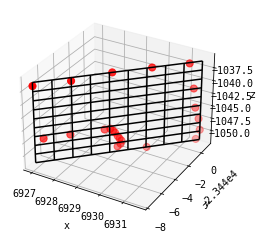

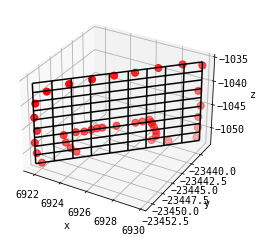

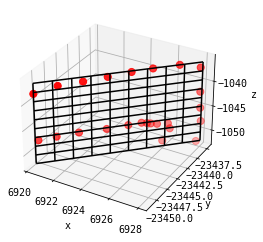

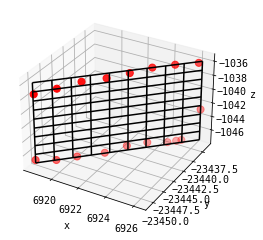

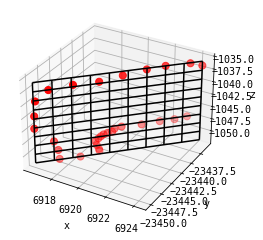

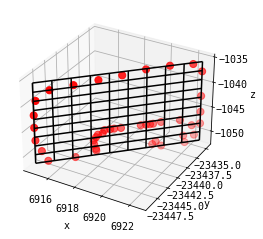

In [15]:
for k, v in datasets.items():
    print(k)
    print()
    
    data = v
    data_centroid = np.mean(data, axis=0)

    #==========
    # best fit plane

    # regular grid covering the domain of the data
    mn = np.min(data, axis=0)
    mx = np.max(data, axis=0)

    a, b, c, d, plane = best_fit_plane(data[:,0], data[:,1], data[:,2])

    # we can't use the d, from the best fit situation, we have to calculate it 
    # relative to the centroid of our data
    d = -data_centroid.dot(np.array([a, b, c]))
    print('Best Fit Plane {}: {a:.5f}x + {b:.5f}y + {c:.5f}z + {d} = 0'.format(plane, a=a, b=b, c=c, d=d))


    if plane == 'XY':
        X, Y = np.meshgrid(np.linspace(mn[0], mx[0], 10),     
                           np.linspace(mn[1], mx[1], 10))

        Z = (-a*X - b*Y - d)/c

    elif plane == 'XZ':
        X, Z = np.meshgrid(np.linspace(mn[0], mx[0], 10), 
                           np.linspace(mn[2], mx[2], 10))

        Y = (-a*X - c*Z - d)/b

    elif plane == 'YZ':
        Y, Z = np.meshgrid(np.linspace(mn[1], mx[1], 10), 
                           np.linspace(mn[2], mx[2], 10))

        X = (-b*Y - c*Z - d)/a

    #==========

    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

    ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
    ax.plot_wireframe(X,Y,Z, color='k')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.axis('auto')
    ax.axis('tight')    

    fig.show()

# Problem Data 2021-03-14

Here is some problem data from Riccardo Del Bosco, the dets all fail with 0 on my other python implementation

In [16]:
X=np.array([96404.97878189, 96404.97878189, 96404.97878189, 96404.97878189,96404.97878189, 96404.97878189, 96404.97878189, 96404.97878189])
Y=np.array([28715.20155245, 28715.20155245, 28711.16935499, 28708.54801013, 28713.19799904, 28710.56740827, 28714.53503483, 28712.65543137])
Z=np.array([4878.97051668, 4888.97051668, 4878.72718413, 4888.37749766, 4878.94529659, 4888.59309386, 4878.96063776, 4888.78240393])

Best Fit Plane YZ: 1.00000x + -0.00000y + 0.00000z + -6918.9370175080385 = 0


<ipython-input-17-58bf2ee65b1b>:49: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


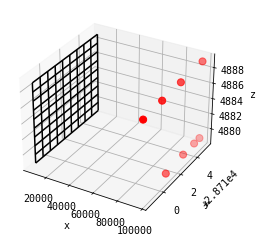

In [17]:
data = np.c_[X,Y,Z]

#==========
# best fit plane

# regular grid covering the domain of the data
mn = np.min(data, axis=0)
mx = np.max(data, axis=0)

a, b, c, d, plane = best_fit_plane(data[:,0], data[:,1], data[:,2])

# we can't use the d, from the best fit situation, we have to calculate it 
# relative to the centroid of our data
d = -data_centroid.dot(np.array([a, b, c]))
print('Best Fit Plane {}: {a:.5f}x + {b:.5f}y + {c:.5f}z + {d} = 0'.format(plane, a=a, b=b, c=c, d=d))


if plane == 'XY':
    X, Y = np.meshgrid(np.linspace(mn[0], mx[0], 10),     
                       np.linspace(mn[1], mx[1], 10))

    Z = (-a*X - b*Y - d)/c
    
elif plane == 'XZ':
    X, Z = np.meshgrid(np.linspace(mn[0], mx[0], 10), 
                       np.linspace(mn[2], mx[2], 10))
    
    Y = (-a*X - c*Z - d)/b
    
elif plane == 'YZ':
    Y, Z = np.meshgrid(np.linspace(mn[1], mx[1], 10), 
                       np.linspace(mn[2], mx[2], 10))

    X = (-b*Y - c*Z - d)/a

#==========

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
ax.plot_wireframe(X,Y,Z, color='k')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.axis('auto')
ax.axis('tight')    
    
fig.show()

# Least Squares Examples from the Web

All of these examples assume an XY plane will fit the data. That isn't always the case! Some data may be mostly vertically polarized.


- https://riptutorial.com/numpy/example/16034/find-the-least-squares-solution-to-a-linear-system-with-np-linalg-lstsq
- https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6
- https://stats.stackexchange.com/questions/326239/fitted-planes-normal-vector-not-perpendicular


In [18]:
# #+----------
# # best-fit linear plane
# A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
# C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients

# # Assume an XZ plane where Y is independent
# a,b,c = C
# print('a = {}'.format(a))
# print('b = {}'.format(b))
# print('c = {}'.format(c))
# # -------------

# # manually manipulate the fit
# a = -0.6
# b = 0.3
# c = 0

# # # regular grid covering the domain of the data
# mn = np.min(data, axis=0)
# mx = np.max(data, axis=0)

# # ----------
# # https://stackoverflow.com/questions/3461869/plot-a-plane-based-on-a-normal-vector-and-a-point-in-matlab-or-matplotlib
# point  = np.array([xa[0], ya[0], za[0]])
# normal = np.array([a, b, c])

# # a plane is a*x+b*y+c*z+d=0
# # [a,b,c] is the normal. Thus, we have to calculate
# # d and we're set
# d = -point.dot(normal)

# # doesn't seem to matter which one we use XZ or YZ, they give the same result... the problem is the best fit algorithm 
# # doesn't seem to be working properly

# # # create y,z
# # Y,Z = np.meshgrid(np.linspace(mn[1], mx[1], 10), 
# #                   np.linspace(mn[2], mx[2], 10))


# # # calculate corresponding z
# # X = (-b*Y - c*Z - d)/a
# # ---------

# # create x,z
# X,Z = np.meshgrid(np.linspace(mn[0], mx[0], 10), 
#                   np.linspace(mn[2], mx[2], 10))


# # calculate corresponding z
# Y = (-a*X - c*Z - d)/b
# # ------------


# # # create x,y
# # X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 10), 
# #                   np.linspace(mn[1], mx[1], 10))


# # # calculate corresponding z
# # Z = (-normal[0] * X - normal[1] * Y - d) * 1.0 /normal[2]
# # -------------


# # # XZ Plane
# # X,Z = np.meshgrid(np.linspace(mn[0], mx[0], 20), 
# #                   np.linspace(mn[2], mx[2], 20))

# # Y = (Z - a*X - c)/b

# # # XY plane 
# # X,Y = np.meshgrid(np.linspace(mn[0], mx[0], 20), 
# #                   np.linspace(mn[1], mx[1], 20))

# # Z = a*X + b*Y + c
# # ================

# #+----------
# fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
# ax.plot_wireframe(X,Y,Z, color='k')
# # ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
# # ax.scatter(X, Y, Z, c='b', s=50)


# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# ax.axis('equal')
# ax.axis('tight')    
    
# fig.show()

In [19]:
# # https://gist.github.com/amroamroamro/1db8d69b4b65e8bc66a6

# # some 3-dim points
# mean = np.array([0.0,0.0,0.0])
# cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
# data = np.random.multivariate_normal(mean, cov, 50)

# # regular grid covering the domain of the data
# X,Y = np.meshgrid(np.arange(-3.0, 3.0, 0.5), np.arange(-3.0, 3.0, 0.5))
# XX = X.flatten()
# YY = Y.flatten()

# order = 1    # 1: linear, 2: quadratic
# if order == 1:
#     # best-fit linear plane
#     A = np.c_[data[:,0], data[:,1], np.ones(data.shape[0])]
#     C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])    # coefficients
    
#     # evaluate it on grid
#     Z = C[0]*X + C[1]*Y + C[2]
    
#     #or expressed using matrix/vector product
#     Z = np.dot(np.c_[XX, YY, np.ones(XX.shape)], C).reshape(X.shape)

# elif order == 2:
#     # best-fit quadratic curve
#     A = np.c_[np.ones(data.shape[0]), data[:,:2], np.prod(data[:,:2], axis=1), data[:,:2]**2]
#     C,_,_,_ = scipy.linalg.lstsq(A, data[:,2])
    
#     # evaluate it on a grid
#     Z = np.dot(np.c_[np.ones(XX.shape), XX, YY, XX*YY, XX**2, YY**2], C).reshape(X.shape)

# # plot points and fitted surface
# fig = plt.figure()
# ax = fig.gca(projection='3d')
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
# ax.scatter(data[:,0], data[:,1], data[:,2], c='r', s=50)
# plt.xlabel('X')
# plt.ylabel('Y')
# ax.set_zlabel('Z')
# ax.axis('equal')
# ax.axis('tight')
# plt.show()

In [20]:
# # https://math.stackexchange.com/questions/99299/best-fitting-plane-given-a-set-of-points
# # https://stackoverflow.com/questions/12299540/plane-fitting-to-4-or-more-xyz-points

# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# N_POINTS = 10
# TARGET_X_SLOPE = 2
# TARGET_y_SLOPE = 3
# TARGET_OFFSET  = 5
# EXTENTS = 5
# NOISE = 5

# # create random data
# xs = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
# ys = [np.random.uniform(2*EXTENTS)-EXTENTS for i in range(N_POINTS)]
# zs = []
# for i in range(N_POINTS):
#     zs.append(xs[i]*TARGET_X_SLOPE + \
#               ys[i]*TARGET_y_SLOPE + \
#               TARGET_OFFSET + np.random.normal(scale=NOISE))

# # plot raw data
# plt.figure()
# ax = plt.subplot(111, projection='3d')
# ax.scatter(xs, ys, zs, color='b')

# # do fit
# tmp_A = []
# tmp_b = []
# for i in range(len(xs)):
#     tmp_A.append([xs[i], ys[i], 1])
#     tmp_b.append(zs[i])
# b = np.matrix(tmp_b).T
# A = np.matrix(tmp_A)
# fit = (A.T * A).I * A.T * b
# errors = b - A * fit
# residual = np.linalg.norm(errors)

# print( "solution:")
# print( "%f x + %f y + %f = z" % (fit[0], fit[1], fit[2]))
# print( "errors:")
# print( errors)
# print( "residual:")
# print( residual)

# # plot plane
# xlim = ax.get_xlim()
# ylim = ax.get_ylim()
# X,Y = np.meshgrid(np.arange(xlim[0], xlim[1]),
#                   np.arange(ylim[0], ylim[1]))
# Z = np.zeros(X.shape)
# for r in range(X.shape[0]):
#     for c in range(X.shape[1]):
#         Z[r,c] = fit[0] * X[r,c] + fit[1] * Y[r,c] + fit[2]
# ax.plot_wireframe(X,Y,Z, color='k')

# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# plt.show()

In [21]:
# mean = np.array([0.0,0.0,0.0])
# cov = np.array([[1.0,-0.5,0.8], [-0.5,1.1,0.0], [0.8,0.0,1.0]])
# data = np.random.multivariate_normal(mean, cov, 50)


# #https://stats.stackexchange.com/questions/326239/fitted-planes-normal-vector-not-perpendicular

# grid_steps = 20

# # regular grid covering the domain of the data
# mn = np.min(data, axis=0)
# mx = np.max(data, axis=0)

# X, Y = np.meshgrid(np.linspace(mn[0], mx[0], grid_steps),
#                    np.linspace(mn[1], mx[1], grid_steps))
# XX = X.flatten()
# YY = Y.flatten()

# # best-fit linear plane (1st-order)
# A = np.c_[data[:, 0], data[:, 1], np.ones(data.shape[0])]
# C, _, _, _ = scipy.linalg.lstsq(A, data[:, 2])    # coefficients

# # evaluate it on grid
# Z = C[0] * X + C[1] * Y + C[2]

# gci = int((grid_steps / 2) - 1 ) # grid_center_index

# centroid = np.array([X[gci, gci], Y[gci, gci], Z[gci, gci]]).reshape(1,-1)  # take center point of grid steps

# surface_norm = np.array([-C[0], -C[1], 1]).reshape(1,-1)

# surface_norm_unit = np.normalize(surface_norm, norm='l2')

# centroid_norm = centroid + surface_norm_unit



# # plot points and fitted surface using Matplotlib
# fig = plt.figure(figsize=(10, 10))
# ax = fig.gca(projection='3d')
# ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.2)
# ax.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', s=50)
# ax.quiver(*[*centroid.reshape(-1,).tolist(),*surface_norm_unit.reshape(-1,).tolist()])
# ax.scatter(centroid[0,0], centroid[0,1], centroid[0,2], c='b', s=100)
# ax.scatter(centroid_norm[0,0], centroid_norm[0,1], centroid_norm[0,2], c='b', s=100)
# plt.xlabel('X')
# plt.ylabel('Y')
# ax.set_zlabel('Z')
# ax.axis('equal')
# ax.axis('tight')
